In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
prod_df = pd.read_excel("./data/Prod_rev1.xlsx")
prod_df.head()

,Date,M/C,Ton,Status,ItemId,ItemName,Material Code,Material Name,M/B Code,M/B Name,...,Part TestMold,DownTime NEW,NG case,Shief,Zone,Unnamed: 200,Part NG ( kg ),Part Adjust ( kg ),Pugre ( kg ),Total Defect
0,2023-04-01,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,N,6,N6,0.0,0.0,0.0,429.0
1,2023-04-01,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,D,6,D6,0.0,0.0,0.0,254.0
2,2023-04-03,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,D,6,D6,0.0,0.0,0.0,0.0
3,2023-04-03,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,N,6,N6,0.0,0.0,0.0,402.0
4,2023-04-04,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,D,6,D6,0.0,0.0,0.0,538.0


In [3]:
prod_df['M/C'].value_counts()

I-099    313
I-103     77
I-072     69
I-080     62
I-107     60
I-122     57
I-105     55
I-102     52
I-056     50
I-073     50
I-104     33
I-059     27
I-109     23
I-082     20
I-001     16
I-106     10
I-068      6
I-063      5
I-015      2
I-092      2
I-057      1
Name: M/C, dtype: int64

In [4]:
for col in prod_df.columns:
    try:
        new_col = prod_df[col].replace("-", None).astype(float)
        prod_df[col] = new_col
    except:
        print(f"'{col}' is not convertible to Float")

'Date' is not convertible to Float
'M/C' is not convertible to Float
'Ton' is not convertible to Float
'Status' is not convertible to Float
'ItemId' is not convertible to Float
'ItemName' is not convertible to Float
'Material Code' is not convertible to Float
'Material Name' is not convertible to Float
'M/B  Code' is not convertible to Float
'M/B  Name' is not convertible to Float
'Colour' is not convertible to Float
'Customer' is not convertible to Float
'Group Industry' is not convertible to Float
'Die  No' is not convertible to Float
'Shief' is not convertible to Float
'Unnamed: 200' is not convertible to Float


In [5]:
# Calculate planned and unplanned downtime by summing downtime of each category
prod_df['Planned stop time'] = prod_df['Over hual machine'] + prod_df['Over hual mold'] + prod_df['Process adjustment']
prod_df['Unplanned stop time'] = prod_df['Down mold'] + prod_df['Up mold'] + prod_df['Setup equipment'] + prod_df['Adjust setup'] + prod_df['Qc accepted time'] + prod_df['Robot problem'] + prod_df['Adjust mc'] + prod_df['Change filter'] + prod_df['Change insert'] + prod_df['Change mat'] + prod_df['Change Date'] + prod_df['Clean machine'] + prod_df['Clean mold'] + prod_df['Clean screw'] + prod_df['Hopper problem'] + prod_df['Jig problem'] + prod_df['M/C problem'] + prod_df['Mold problem'] + prod_df['Nozzle Leak'] + prod_df['Clogged Gauge'] + prod_df['Part attached mold '] + prod_df['Power failure '] + prod_df['Contaminated pellets'] + prod_df['Pellets do not drop'] + prod_df['Mold waiting '] + prod_df['Packing waiting'] + prod_df['Assembly part waiting '] + prod_df['Waiting for crane '] + prod_df['Mold mounting waiting'] + prod_df['Waiting to adjust work'] + prod_df['Water leak '] + prod_df['Pellet drying'] + prod_df['Gauge pluged '] + prod_df['Waiting for pellets '] + prod_df['Runner attached mold '] 

C:\Users\Admin\AppData\Local\Temp\ipykernel_16412\1396162521.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_df['Planned stop time'] = prod_df['Over hual machine'] + prod_df['Over hual mold'] + prod_df['Process adjustment']
C:\Users\Admin\AppData\Local\Temp\ipykernel_16412\1396162521.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_df['Unplanned stop time'] = prod_df['Down mold'] + prod_df['Up mold'] + prod_df['Setup equipment'] + prod_df['Adjust setup'] + prod_df['Qc accepted time'] + prod_df['Robot problem'] +

In [6]:
prod_df.columns.tolist()

['Date',
 'M/C',
 'Ton',
 'Status',
 'ItemId',
 'ItemName',
 'Material Code',
 'Material Name',
 'M/B  Code',
 'M/B  Name',
 'Colour',
 'Customer',
 'Group Industry',
 'Die  No',
 'Cavity',
 'CycleTime  STD',
 'Cycle Time Act',
 '%  CycleTime',
 'Weight  STD',
 'Weight  Act',
 'R/W ( Short / g )',
 'Manpower',
 'Labour',
 'LabourHour',
 'TimeSheft',
 'DownTime',
 '% DownTime',
 'STD Change  Mould',
 'STD Chang Mould New',
 'Change mold  Actual',
 '% SetupTime',
 'STD QCaccepted',
 'Qc accepted time',
 'Adjust setup',
 'Down mold',
 'Set up time',
 'Setup equipment',
 'Up mold',
 'Adjust mc',
 'Change filter',
 'Change insert',
 'Change mat',
 'Change mold',
 'Change Date',
 'Clean machine',
 'Clean mold',
 'Clean screw',
 'Hopper problem',
 'Jig problem',
 'M/C problem',
 'Mold problem',
 'Nozzle Leak',
 'Other',
 'Over hual machine',
 'Over hual mold',
 'Recheck',
 'Rework',
 'Robot problem',
 'Runner attached mold ',
 'Stop m/c',
 'Test mold',
 'Clogged Gauge',
 'Emergency incident',

In [7]:
i99_df = prod_df[prod_df['M/C'] == 'I-099'].copy()
i102_df = prod_df[prod_df['M/C'] == 'I-102'].copy()

In [8]:
prod_df['TimeSheft']

0      720.0
1      530.0
2      720.0
3      720.0
4      720.0
       ...  
985    660.0
986    660.0
987     34.0
988    660.0
989    660.0
Name: TimeSheft, Length: 990, dtype: float64

In [9]:
def display_corr(df, col, threshold=0.2):
    corr = df.corr(numeric_only=True)[col]
    corr = corr[(corr <= -threshold) | (corr >= threshold)].sort_values(ascending=False)
    corr.plot.bar(figsize=(16, 4))
    plt.show()

In [10]:
i99_df

,Date,M/C,Ton,Status,ItemId,ItemName,Material Code,Material Name,M/B Code,M/B Name,...,NG case,Shief,Zone,Unnamed: 200,Part NG ( kg ),Part Adjust ( kg ),Pugre ( kg ),Total Defect,Planned stop time,Unplanned stop time
0,2023-04-01,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,NaN,N,6.0,N6,0.0,0.0,0.0,429.0,0.0,7.0
1,2023-04-01,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,NaN,D,6.0,D6,0.0,0.0,0.0,254.0,0.0,30.0
2,2023-04-03,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,NaN,D,6.0,D6,0.0,0.0,0.0,0.0,720.0,0.0
3,2023-04-03,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,NaN,N,6.0,N6,0.0,0.0,0.0,402.0,0.0,62.0
4,2023-04-04,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,NaN,D,6.0,D6,0.0,0.0,0.0,538.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,2024-04-03,I-099,130,STD,4-BOSCH-1928406412-J04-EX-INJ,1928406412 SECONDARY LOCKING (EX),1-BOSCH-PA66-H2-G35-EX,PA66 LATAMID H2 G35 0003 NATURAL (EX),NaN,NaN,...,160.0,D,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,2024-04-03,I-099,130,STD,4-BOSCH-1928406412-J04-EX-INJ,1928406412 SECONDARY LOCKING (EX),1-BOSCH-PA66-H2-G35-EX,PA66 LATAMID H2 G35 0003 NATURAL (EX),NaN,NaN,...,160.0,N,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2024-04-04,I-099,130,STD,4-BOSCH-1928406412-J04-EX-INJ,1928406412 SECONDARY LOCKING (EX),1-BOSCH-PA66-H2-G35-EX,PA66 LATAMID H2 G35 0003 NATURAL (EX),NaN,NaN,...,160.0,D,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2024-04-04,I-099,130,STD,4-BOSCH-1928406412-J04-EX-INJ,1928406412 SECONDARY LOCKING (EX),1-BOSCH-PA66-H2-G35-EX,PA66 LATAMID H2 G35 0003 NATURAL (EX),NaN,NaN,...,160.0,N,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


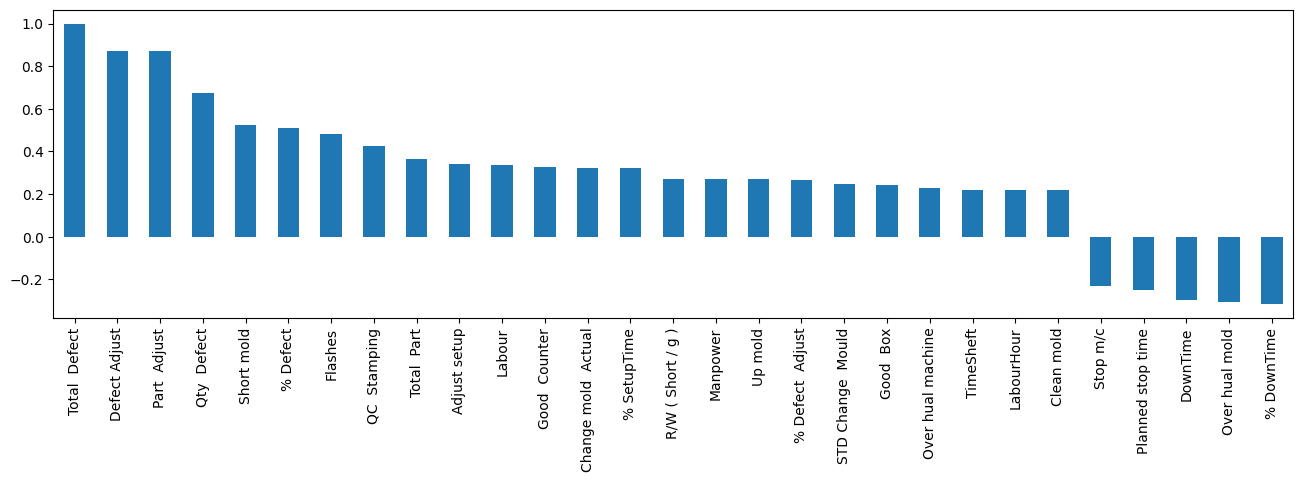

In [11]:
display_corr(i99_df, 'Total  Defect')

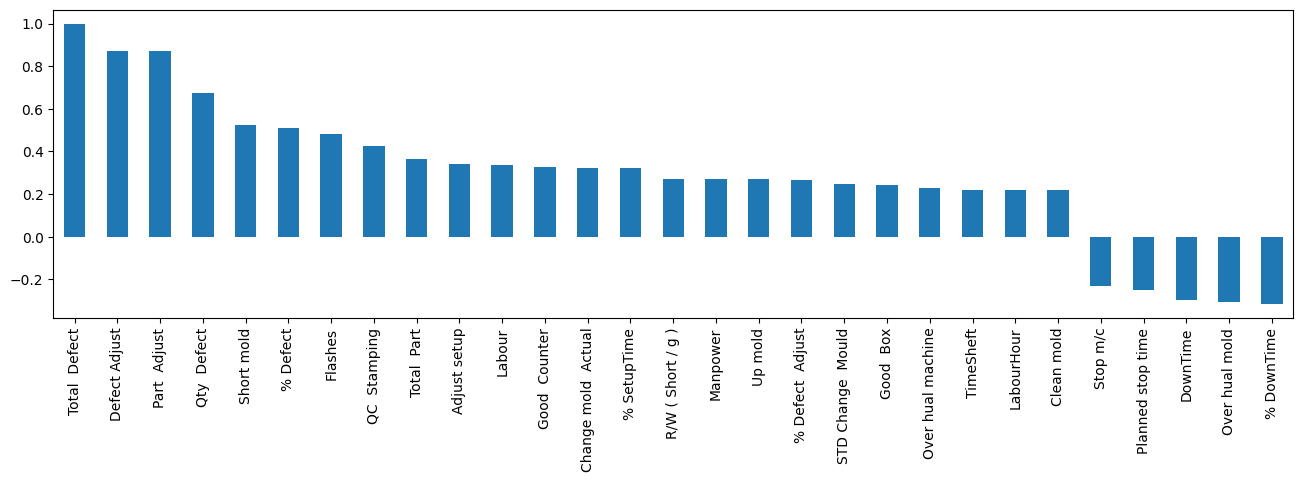

In [12]:
display_corr(prod_df, 'Total  Defect')

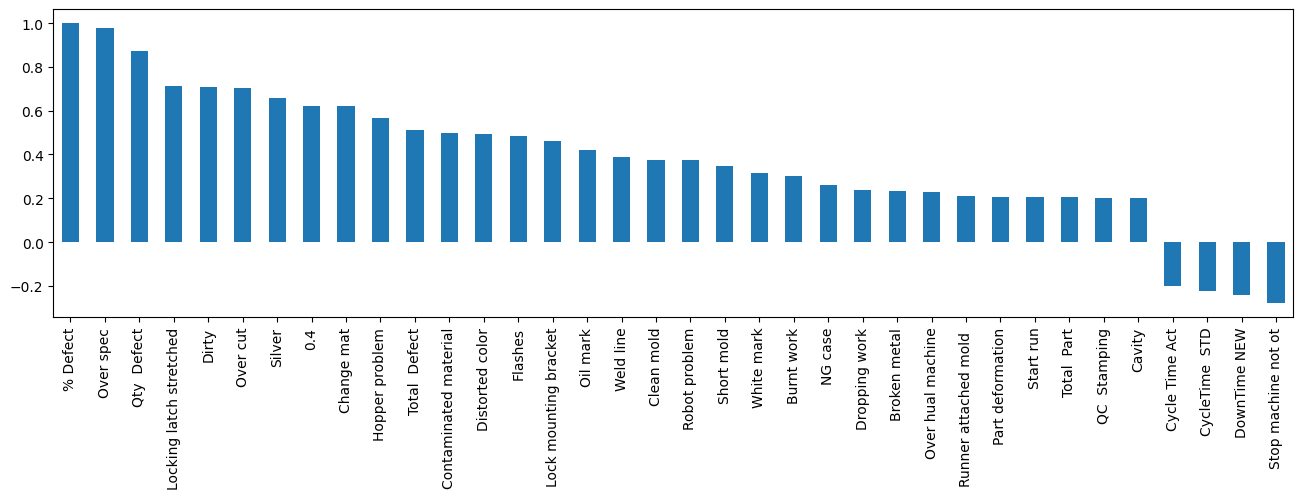

In [13]:
display_corr(prod_df, '% Defect')

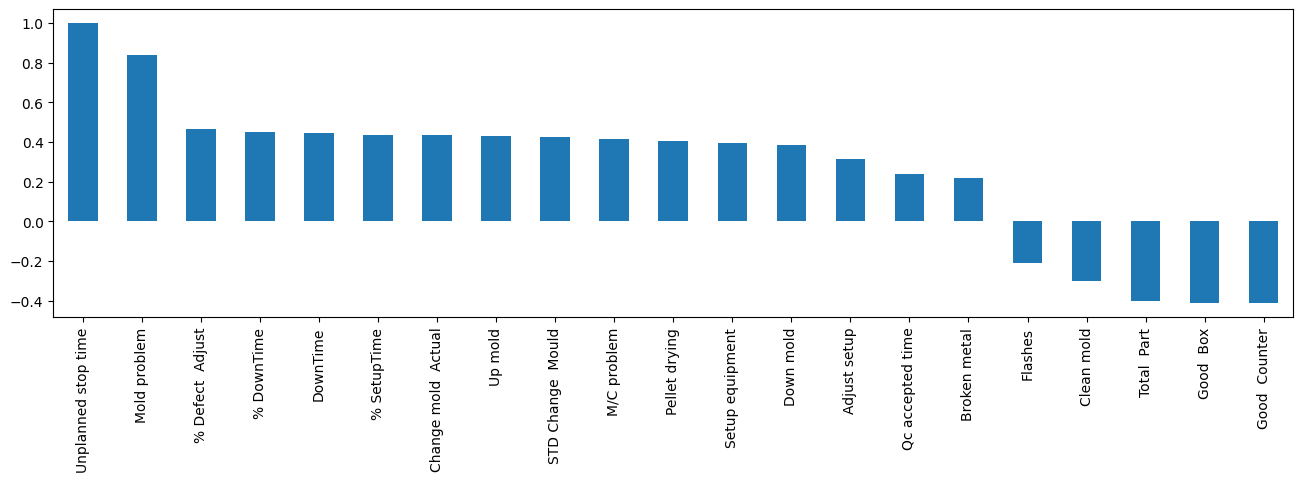

In [14]:
display_corr(i99_df, 'Unplanned stop time')

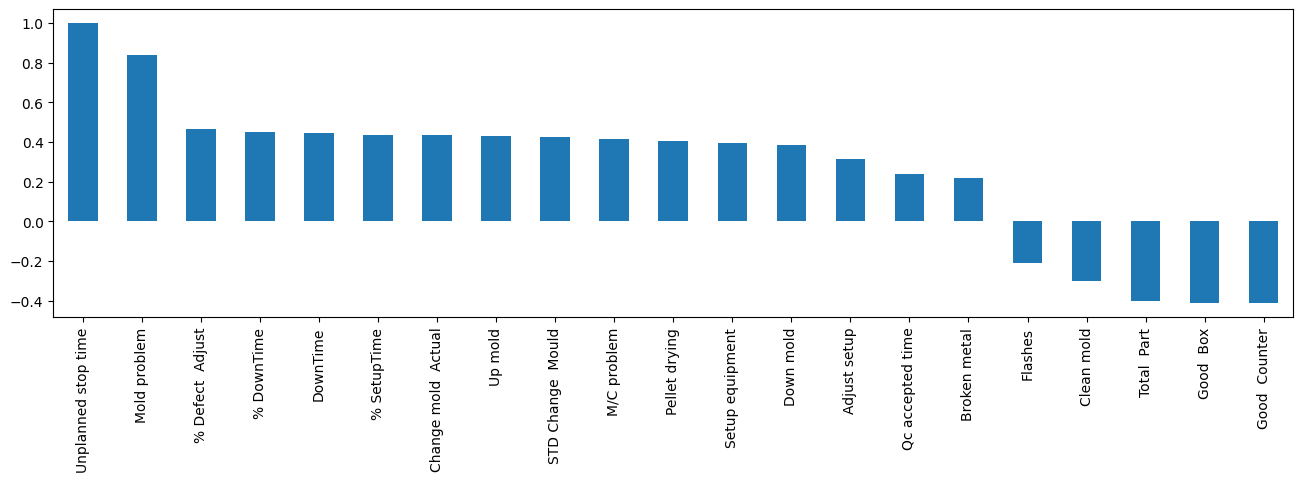

In [15]:
display_corr(prod_df, 'Unplanned stop time')

c:\Users\Admin\anaconda3\envs\dsai\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\envs\dsai\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\envs\dsai\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


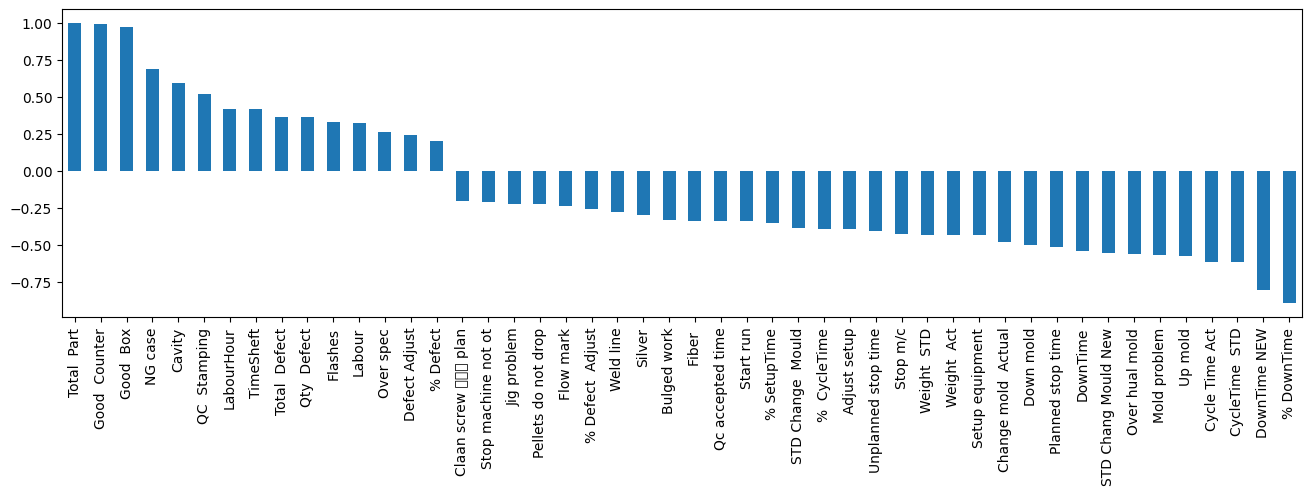

In [16]:
display_corr(prod_df, 'Total  Part')

In [17]:
i99_downtime = i99_df[['Date', 'Planned stop time', 'Unplanned stop time']].groupby('Date').sum()
i99_downtime

,Planned stop time,Unplanned stop time
Date,,
2023-04-01,0.0,37.0
2023-04-03,720.0,62.0
2023-04-04,0.0,17.0
2023-04-05,0.0,2.0
2023-04-17,0.0,176.0
...,...,...
2024-04-01,0.0,0.0
2024-04-02,0.0,0.0
2024-04-03,0.0,0.0


In [18]:
i99_downtime = i99_df[['Date', 'Planned stop time', 'Unplanned stop time']].groupby('Date').sum()
i102_downtime = i102_df[['Date', 'Planned stop time', 'Unplanned stop time']].groupby('Date').sum()
i99_downtime.head()

,Planned stop time,Unplanned stop time
Date,,
2023-04-01,0.0,37.0
2023-04-03,720.0,62.0
2023-04-04,0.0,17.0
2023-04-05,0.0,2.0
2023-04-17,0.0,176.0


### Time Value Imputations

In this project, we will apply the trend and seasonality decomposition method to impute missing dates in our dataset.

In [19]:
# Get dates that are not included in the dataset
date_range = pd.date_range(start=i99_downtime.index.min(), end=i99_downtime.index.max(), freq="D")
missing_dates = date_range[~date_range.isin(i99_downtime.index)]
print(missing_dates)

DatetimeIndex(['2023-04-02', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14',
               ...
               '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
               '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29'],
              dtype='datetime64[ns]', length=205, freq=None)


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time-series data into trends and seasonalities
planned_result = seasonal_decompose(i99_downtime['Planned stop time'], model="additive", period=12, extrapolate_trend='freq')
unplanned_result = seasonal_decompose(i99_downtime['Unplanned stop time'], model="additive", period=12, extrapolate_trend='freq')

In [21]:
# Fill NaN trends using forward-filling method
planned_trend = planned_result.trend.reindex(date_range)
unplanned_trend = unplanned_result.trend.reindex(date_range)
planned_trend_filled = planned_trend.ffill()
unplanned_trend_filled = unplanned_trend.ffill()

In [22]:
# Fill NaN seasonalities using forward-filling method
planned_seasonal = planned_result.seasonal.reindex(date_range)
unplanned_seasonal = unplanned_result.seasonal.reindex(date_range)
planned_seasonal_filled = planned_seasonal.ffill()
unplanned_seasonal_filled = unplanned_seasonal.ffill()

In [23]:
# Get imputed data by trend + seasonality + residual
imputed_planned = planned_trend_filled + planned_seasonal_filled + planned_result.resid.reindex(date_range).fillna(0)
imputed_unplanned = unplanned_trend_filled + unplanned_seasonal_filled + unplanned_result.resid.reindex(date_range).fillna(0)

In [24]:
# Set imputed values less than 0 to 0
imputed_planned[imputed_planned < 0] = 0
imputed_unplanned[imputed_unplanned < 0] = 0

In [25]:
imputed_downtime = pd.DataFrame({'Planned stop time': imputed_planned,
                                 'Unplanned stop time': imputed_unplanned})
imputed_downtime.head()

,Planned stop time,Unplanned stop time
2023-04-01,0.000000,37.000000
2023-04-02,56.190724,17.601162
2023-04-03,720.000000,62.000000
2023-04-04,0.000000,17.000000
2023-04-05,0.000000,2.000000


In [26]:
mean_times = i99_downtime.mean()

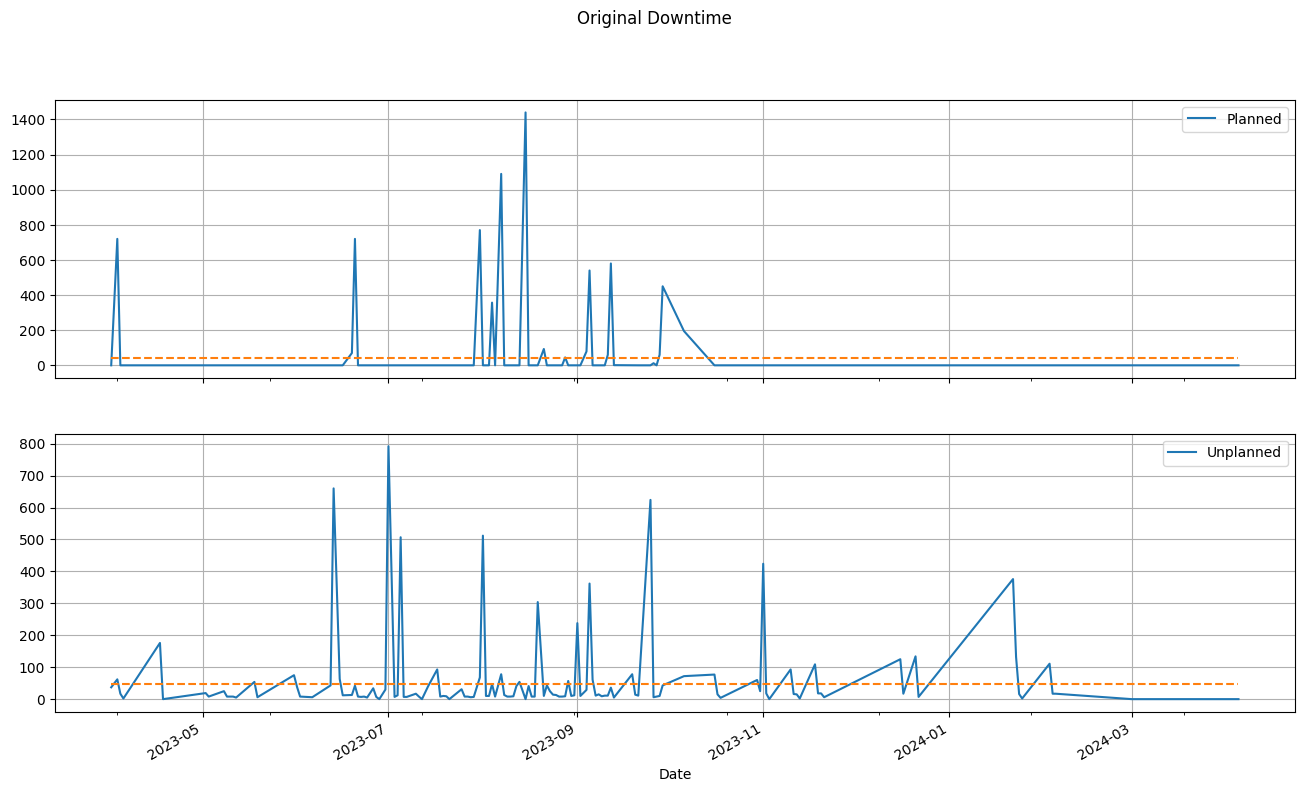

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
i99_downtime['Planned stop time'].plot(ax=axs[0], label='Planned')
axs[0].plot(i99_downtime.index, [mean_times['Planned stop time']]*len(i99_downtime), linestyle='--')
i99_downtime['Unplanned stop time'].plot(ax=axs[1], label='Unplanned')
axs[1].plot(i99_downtime.index, [mean_times['Unplanned stop time']]*len(i99_downtime), linestyle='--')
fig.suptitle("Original Downtime")

for ax in axs:
    ax.legend()
    ax.grid()

plt.show()

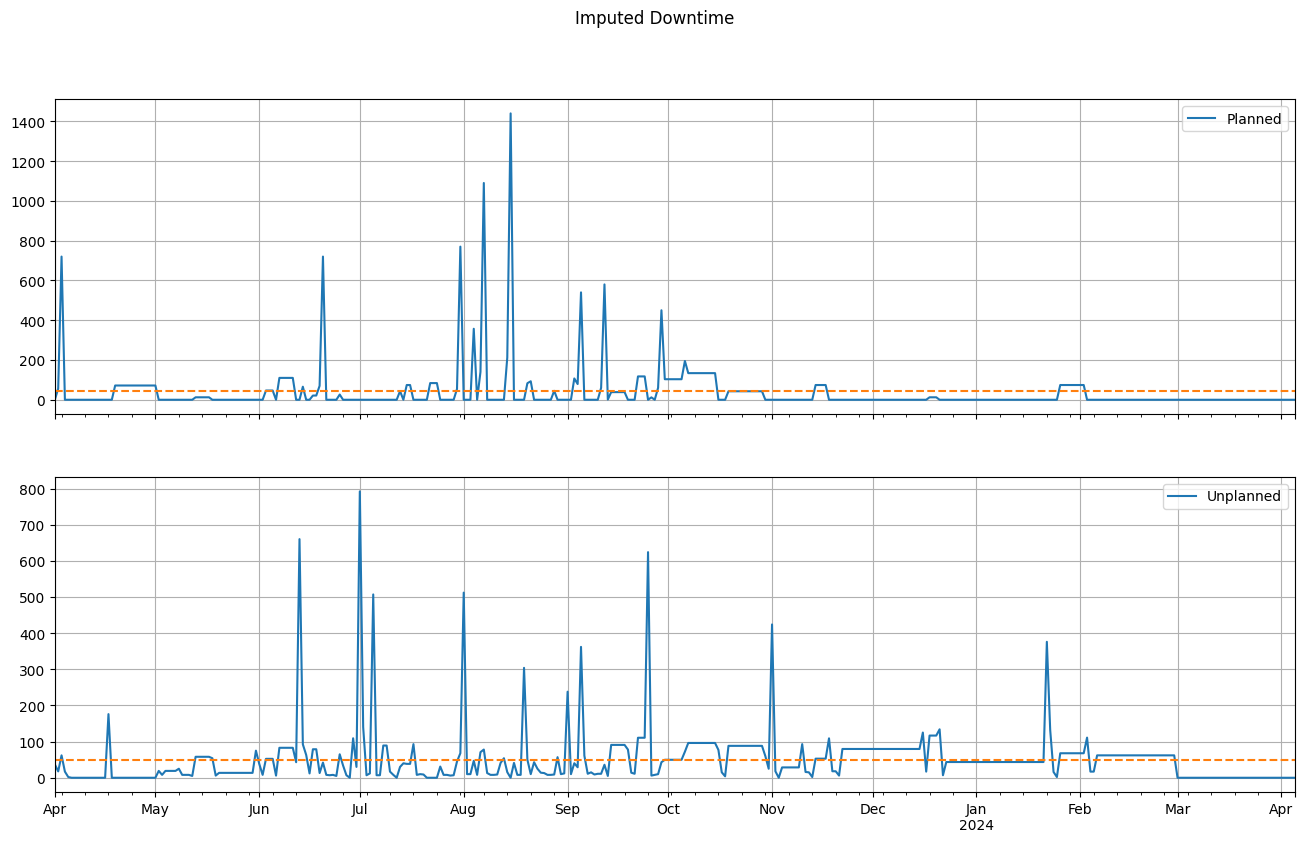

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
imputed_downtime['Planned stop time'].plot(ax=axs[0], label='Planned')
axs[0].plot(imputed_downtime.index, [mean_times['Planned stop time']]*len(imputed_downtime), linestyle='--')
imputed_downtime['Unplanned stop time'].plot(ax=axs[1], label='Unplanned')
axs[1].plot(imputed_downtime.index, [mean_times['Unplanned stop time']]*len(imputed_downtime), linestyle='--')
fig.suptitle("Imputed Downtime")

for ax in axs:
    ax.legend()
    ax.grid()

plt.show()

In [29]:
prep_data_path = "./data/imputed_downtime.csv"
imputed_downtime.to_csv(prep_data_path)

### Preprocessing

In [30]:
import torch
from sklearn.preprocessing import MinMaxScaler

In [31]:
imputed_downtime = pd.read_csv("./data/imputed_downtime.csv", index_col=0)

In [32]:
# train-test split for time series
train_set = imputed_downtime['Unplanned stop time'].values.astype('float')
train_set.shape

(371,)

In [33]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_set_norm = scaler.fit_transform(train_set.reshape(-1, 1))

#convert np to tensor
train_set_norm = torch.FloatTensor(train_set_norm).view(-1)
train_set_norm.shape

torch.Size([371])

In [34]:
#define function to create training set (ws days -> 1 day)
def create_data(seq, label):
    x_out, y_out = [], []
    #array to hold the out
    for i in range(seq.shape[0] - label):
        x = seq[i:i+label]          # 30 days in the past
        y = seq[i+label:i+label+1]  # next day
        x_out.append(x)
        y_out.append(y)
    
    
    return np.array(x_out), np.array(y_out)

In [35]:
#define window size
ws = 30 #use 30 days in the past to predict the next day

X, y = create_data(train_set_norm, ws)

In [36]:
train_size = int(len(y) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

### Modeling

In [37]:
import torch.nn as nn

class LSTM_model(nn.Module):
    def __init__(self, input_s = 1, hs = 50, num_layers=1, output_size = 1):
        super().__init__()
        self.hs = hs
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_s, hs, num_layers, batch_first=True)  #LSTM will automatically create W(s) for us
        self.linear = nn.Linear(hs, output_size)  #take output of LSTM, project to prediction
        
    def forward(self, input_):
        h0 = torch.zeros(self.num_layers, input_.size(0), self.hs)
        c0 = torch.zeros(self.num_layers, input_.size(0), self.hs)

        # out, _ = self.lstm(input_.reshape(input_.shape[0], 1, -1)) #30, 1, 1
        out, _ = self.lstm(input_, (h0, c0))
        out    = self.linear(out[:, -1, :])  #30, 100
        return out

In [38]:
torch.manual_seed(42)
model = LSTM_model(num_layers=2)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

c:\Users\Admin\anaconda3\envs\dsai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    print(f'{sum(params):>6}')
    
count_parameters(model)

 31051


In [40]:
epochs = 500
prev_loss = np.inf
model_path = "./model/lstm.pt"

for i in range(1, epochs+1):
    
    # tuple-unpack the chaky_data set
    y_pred = model(X_train.unsqueeze(-1)).squeeze()
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    # print training result
    if i % 20 == 0:
        curr_loss = loss.item()
        print(f'Epoch: {i:2} Loss: {curr_loss:10.8f}')

        if curr_loss < prev_loss:
            torch.save(model.state_dict(), model_path)
            prev_loss = curr_loss

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([272, 1])) that is different to the input size (torch.Size([272])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 20 Loss: 0.62985802
Epoch: 40 Loss: 0.59447807
Epoch: 60 Loss: 0.55839252
Epoch: 80 Loss: 0.52035850
Epoch: 100 Loss: 0.47903264
Epoch: 120 Loss: 0.43283415
Epoch: 140 Loss: 0.37990016
Epoch: 160 Loss: 0.31819966
Epoch: 180 Loss: 0.24626489
Epoch: 200 Loss: 0.16610201
Epoch: 220 Loss: 0.09192181
Epoch: 240 Loss: 0.05757183
Epoch: 260 Loss: 0.05703830
Epoch: 280 Loss: 0.05654830
Epoch: 300 Loss: 0.05655454
Epoch: 320 Loss: 0.05654527
Epoch: 340 Loss: 0.05654386
Epoch: 360 Loss: 0.05654243
Epoch: 380 Loss: 0.05654100
Epoch: 400 Loss: 0.05653954
Epoch: 420 Loss: 0.05653804
Epoch: 440 Loss: 0.05653650
Epoch: 460 Loss: 0.05653494
Epoch: 480 Loss: 0.05653334
Epoch: 500 Loss: 0.05653170


### Evaluation

In [41]:
model = LSTM_model(num_layers=2)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [42]:
X_test.shape

torch.Size([69, 30])

In [43]:
model.eval()

with torch.no_grad():
    yhat = model(X_test.unsqueeze(-1)).squeeze()
    test_loss = criterion(yhat, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.0114


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([69, 1])) that is different to the input size (torch.Size([69])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


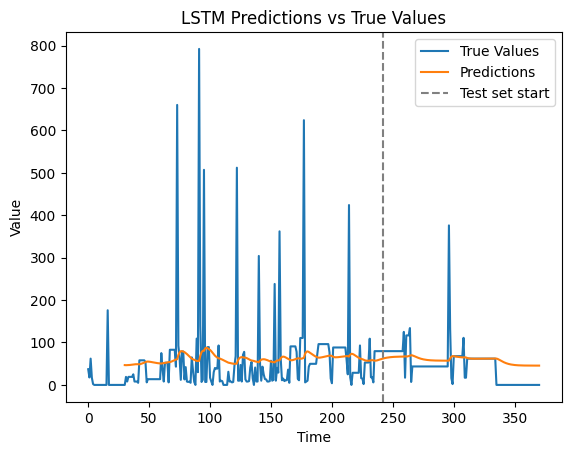

In [44]:
import matplotlib.pyplot as plt

# Concatenate the training and test predictions
with torch.no_grad():
    train_outputs = model(X_train.unsqueeze(-1)).squeeze().numpy()
    test_outputs = model(X_test.unsqueeze(-1)).squeeze().numpy()
all_outputs = np.concatenate((train_outputs, test_outputs))
all_outputs = scaler.inverse_transform(all_outputs.reshape(-1, 1)).flatten()

# Calculate the index where the test set starts
test_start_index = len(X) - len(y_test) - ws

# Plot the true values and the predictions
plt.plot(train_set, label="True Values")
plt.plot(range(ws, ws + len(all_outputs)), all_outputs, label="Predictions")
plt.axvline(x=test_start_index, color='gray', linestyle='--', label="Test set start")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("LSTM Predictions vs True Values")
plt.show()